# MENTAL HEALTH PREDICTION

# IMPORTING DATASET AND NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv('mental_health_and_technology_usage_2024 (1).csv')

# DATA PREPROCESSING

In [ ]:
# Display the first few rows and basic information about the dataset
print(data.head())
print(data.info())

# Step 2: Preprocess the data
# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any) with the mode (most frequent value) of each column
data = data.fillna(data.mode().iloc[0])

data.drop(columns=['User_ID'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Stress_Level', 'Support_Systems_Access','Mental_Health_Status', 'Work_Environment_Impact', 'Online_Support_Usage'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


      User_ID  Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0  USER-00001   23  Female                    6.57                      6.00   
1  USER-00002   21    Male                    3.01                      2.57   
2  USER-00003   51    Male                    3.04                      6.14   
3  USER-00004   25  Female                    3.84                      4.48   
4  USER-00005   53    Male                    1.20                      0.56   

   Gaming_Hours  Screen_Time_Hours Mental_Health_Status Stress_Level  \
0          0.68              12.36                 Good          Low   
1          3.74               7.61                 Poor         High   
2          1.26               3.16                 Fair         High   
3          2.59              13.08            Excellent       Medium   
4          0.29              12.63                 Good          Low   

   Sleep_Hours  Physical_Activity_Hours Support_Systems_Access  \
0         8.01      

In [ ]:
data.columns

Index(['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
       'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours',
       'Physical_Activity_Hours', 'Gender_Male', 'Gender_Other',
       'Stress_Level_Low', 'Stress_Level_Medium', 'Support_Systems_Access_Yes',
       'Mental_Health_Status_Fair', 'Mental_Health_Status_Good',
       'Mental_Health_Status_Poor', 'Work_Environment_Impact_Neutral',
       'Work_Environment_Impact_Positive', 'Online_Support_Usage_Yes'],
      dtype='object')

In [ ]:
len(data)

10000

In [ ]:
(data.head())

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours,Gender_Male,Gender_Other,Stress_Level_Low,Stress_Level_Medium,Support_Systems_Access_Yes,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Work_Environment_Impact_Neutral,Work_Environment_Impact_Positive,Online_Support_Usage_Yes
0,-1.330405,0.030187,0.876421,-1.268838,1.084561,1.040263,0.587332,False,False,True,False,False,False,True,False,False,False,True
1,-1.474088,-1.093244,-0.606123,0.846355,-0.090482,0.537113,0.301608,True,False,False,False,True,False,False,True,False,True,False
2,0.681159,-1.083777,0.936933,-0.867919,-1.191312,1.060940,1.654495,True,False,False,False,False,True,False,False,False,False,False
3,-1.186722,-0.831320,0.219433,0.051430,1.262673,-0.607036,0.095060,False,False,False,True,True,False,False,False,False,False,True
4,0.824842,-1.664426,-1.474902,-1.538422,1.151353,-0.655283,-0.345575,True,False,True,False,False,False,True,False,False,True,True


# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:", numerical_columns)



Numerical Columns: Index(['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
       'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours',
       'Physical_Activity_Hours'],
      dtype='object')


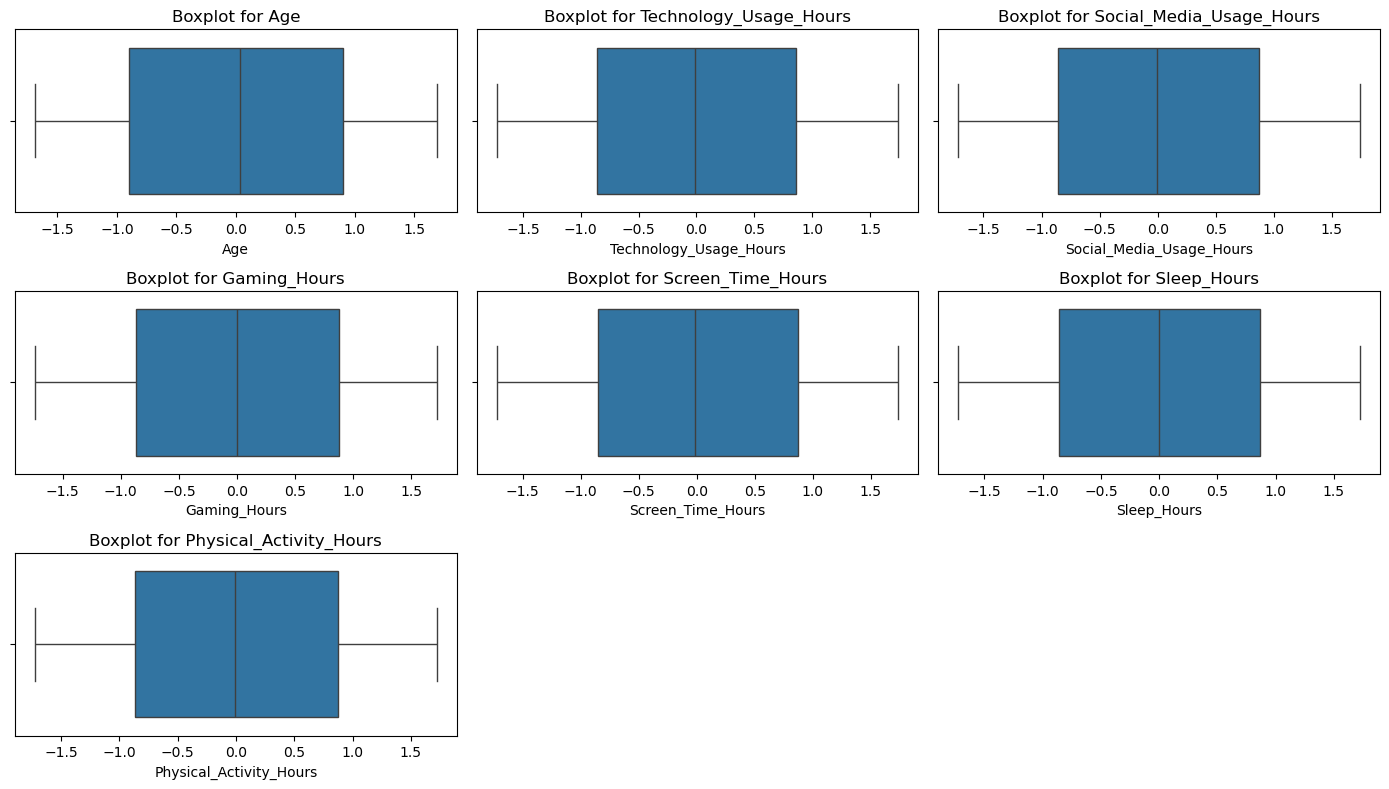

In [ ]:
# Boxplots for numerical features
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

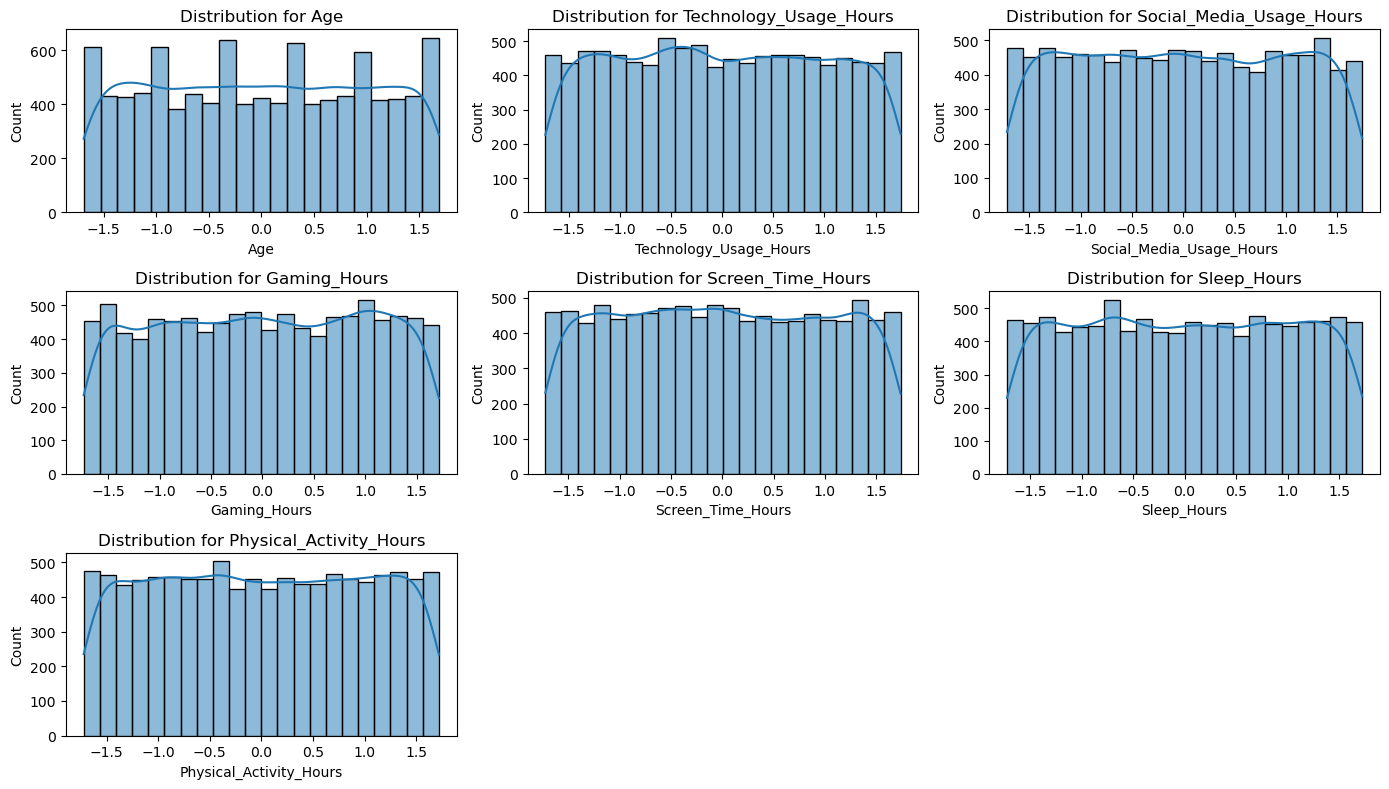

In [ ]:
# Distribution plots for numerical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution for {col}")
plt.tight_layout()
plt.show()

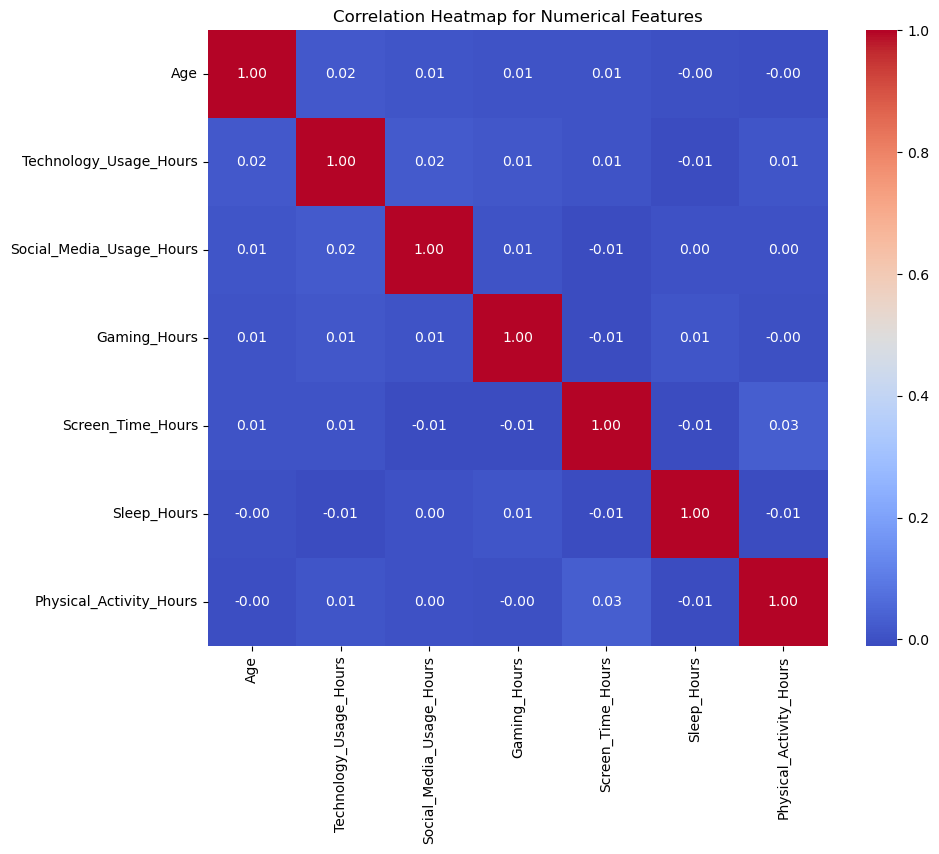

In [ ]:
# Step 5: Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


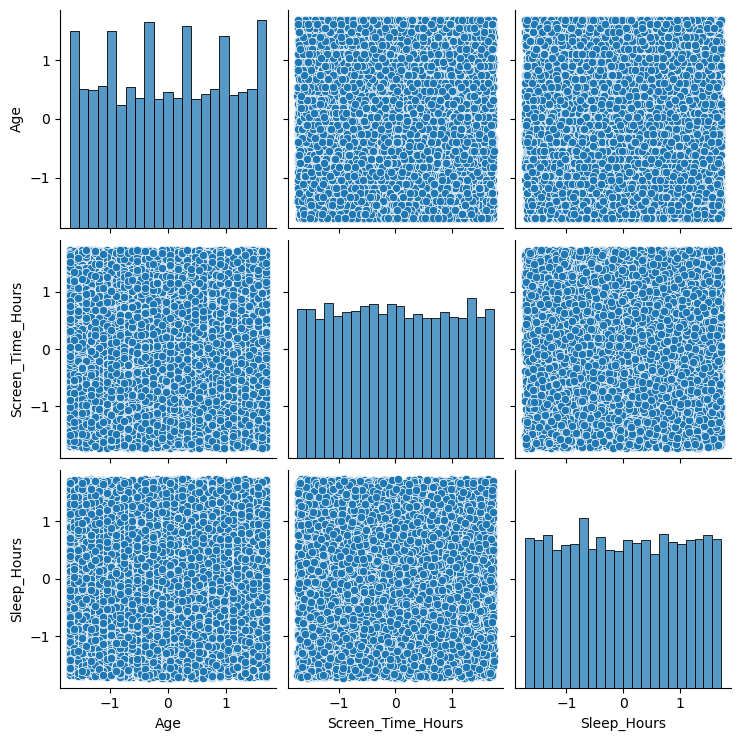

In [ ]:
# Example: Selecting a subset of columns
subset_columns = ["Age", "Screen_Time_Hours", "Sleep_Hours"]  # Adjust as per your data
sns.pairplot(data[subset_columns])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Encoding data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [-1.6896127860479278, -1.6177712314465513, -1.5459296768451751, -1.474088122243799, -1.4022465676424227, -1.3304050130410463, -1.25856345843967, -1.186721903838294, -1.1148803492369177, -1.0430387946355413, -0.9711972400341651, -0.8993556854327888, -0.8275141308314126, -0.7556725762300363, -0.68383102162866, -0.6119894670272837, -0.5401479124259075, -0.4683063578245312, -0.39646480322315497, -0.3246232486217787, -0.25278169402040246, -0.1809401394190262, -0.10909858481764995, -0.037257030216273676, 0.03458452438510259, 0.10642607898647885, 0.1782676335878551, 0.2501091881892314, 0.32195074279060765, 0.3937922973919839, 0.46563385199336016, 0.5374754065947365, 0.6093169611961127, 0.681158515797489, 0.7530000703988652, 0.8248416250002415, 0.8966831796016177, 0.968524734202994, 1.0403662888043703, 1.1122078434057465, 1.1840493980071227, 1.255890952608499, 1.3277325072098753, 1.3995740618112515, 1.4714156164126277, 1.5432571710140042, 1.6150987256153804, 1.6869402802167566]
label

In [ ]:
data.head()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours,Gender_Male,Gender_Other,Stress_Level_Low,Stress_Level_Medium,Support_Systems_Access_Yes,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Work_Environment_Impact_Neutral,Work_Environment_Impact_Positive,Online_Support_Usage_Yes
0,5,557,600,68,1136,401,671,0,0,1,0,0,0,1,0,0,0,1
1,3,201,257,374,661,328,588,1,0,0,0,1,0,0,1,0,1,0
2,33,204,614,126,216,404,981,1,0,0,0,0,1,0,0,0,0,0
3,7,284,448,259,1208,162,528,0,0,0,1,1,0,0,0,0,0,1
4,35,20,56,29,1163,155,400,1,0,1,0,0,0,1,0,0,1,1


In [ ]:
# data.drop(columns=['Gender_Other', 'Stress_Level_Medium', 'Mental_Health_Status_Fair', 'Mental_Health_Status_Good', 'Work_Environment_Impact_Neutral'], inplace=True)
(data.head())

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours,Gender_Male,Gender_Other,Stress_Level_Low,Stress_Level_Medium,Support_Systems_Access_Yes,Mental_Health_Status_Fair,Mental_Health_Status_Good,Mental_Health_Status_Poor,Work_Environment_Impact_Neutral,Work_Environment_Impact_Positive,Online_Support_Usage_Yes
0,5,557,600,68,1136,401,671,0,0,1,0,0,0,1,0,0,0,1
1,3,201,257,374,661,328,588,1,0,0,0,1,0,0,1,0,1,0
2,33,204,614,126,216,404,981,1,0,0,0,0,1,0,0,0,0,0
3,7,284,448,259,1208,162,528,0,0,0,1,1,0,0,0,0,0,1
4,35,20,56,29,1163,155,400,1,0,1,0,0,0,1,0,0,1,1


# MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 3: Split the data into features (X) and target variable (y)
y = data['Mental_Health_Status_Poor']  # Assuming the target is one-hot encoded
X = data.drop(columns=['Mental_Health_Status_Poor'])  # Drop the target column from features

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply standard scaling to features for models that benefit from it (SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
accuracies = {}
for model_name, model in models.items():
    # Use scaled features for SVM and KNN
    if model_name in ['SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

    # Calculate accuracy and store it
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracies[model_name] = test_accuracy

    # Print training accuracy
    print(f"{model_name} Training Accuracy: {train_accuracy:.4f}")

    # Print confusion matrix and classification report for each model
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

    # Perform cross-validation for more reliable accuracy
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_name} Cross-Validated Accuracy: {cv_scores.mean():.4f}\n")

# Display accuracies summary
print("\nModel Accuracies (Test Set):")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


Logistic Regression Training Accuracy: 0.7600
Logistic Regression Test Accuracy: 0.7510
Confusion Matrix:
[[1292  216]
 [ 282  210]]
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.86      0.84      1508
        True       0.49      0.43      0.46       492

    accuracy                           0.75      2000
   macro avg       0.66      0.64      0.65      2000
weighted avg       0.74      0.75      0.74      2000


Logistic Regression Cross-Validated Accuracy: 0.7491

Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy: 0.7510
Confusion Matrix:
[[1307  201]
 [ 297  195]]
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.87      0.84      1508
        True       0.49      0.40      0.44       492

    accuracy                           0.75      2000
   macro avg       0.65      0.63      0.64      2000
weighted avg       0.74      0.75      0.74   

# MODEL PERFORMANCE METRICS

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a list to store the results
results_list = []

for model_name, model in models.items():
    # Use scaled features for SVM and KNN
    if model_name in ['SVM', 'KNN']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Use 1 as the positive label
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Append metrics to the results list
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the results list to a DataFrame
results_table = pd.DataFrame(results_list)

# Display the results table
print("\nModel Performance Metrics:")
print(results_table)



Model Performance Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression    0.7495   0.489412  0.422764  0.453653
1        Random Forest    0.7425   0.470130  0.367886  0.412771
2                  SVM    0.7530   0.497738  0.447154  0.471092
3                  KNN    0.7555   0.503132  0.489837  0.496395
4        Decision Tree    0.7520   0.496016  0.506098  0.501006


# REFINING MODEL ACCURACY

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load your data
# data = pd.read_csv('your_data.csv')

# Step 3: Split data into features (X) and target (y)
y = data['Mental_Health_Status_Poor']
X = data.drop(columns=['Mental_Health_Status_Poor'])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing and Feature Engineering
# Scale the features with MinMaxScaler to keep values non-negative
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection with f_classif (compatible with scaled data)
selector = SelectKBest(f_classif, k='all')  # Adjust 'k' based on optimal number of features
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 5: Hyperparameter Tuning with Grid Search
# Define models and parameter grids
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
    },
    'SVM': {
        'model': SVC(probability=True),  # Enable probability for soft voting
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
    }
}

# Perform grid search for each model
best_estimators = {}
for model_name, model_params in param_grids.items():
    grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}:", grid_search.best_params_)

# Step 6: Ensemble Voting Classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in best_estimators.items()],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# Step 7: Evaluate Models
accuracies = {}
for model_name, model in best_estimators.items():
    # Evaluate each tuned model
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

    # Train accuracy for each model
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"{model_name} Train Accuracy:", train_accuracy)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("\nVoting Classifier Accuracy:", voting_accuracy)

# Display accuracies
print("\nModel Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")
print(f"Voting Classifier: {voting_accuracy:.4f}")

# Step 8: Cross-validation
for model_name, model in best_estimators.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f}")


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Logistic Regression Train Accuracy: 0.8318075898801598
Random Forest Train Accuracy: 1.0
SVM Train Accuracy: 0.8882323568575233
KNN Train Accuracy: 1.0
Decision Tree Train Accuracy: 0.8589380825565912

Voting Classifier Accuracy: 0.752

Model Accuracies:
Logistic Regression: 0.7515
Random Forest: 0.7565
SVM: 0.7475
KNN: 0.7460
Decision Tree: 0.7425
Voting Classifier: 0.7520
Logistic Regression Cross-Validation Accuracy: 0.8318
Random Forest Cross-Validation Accuracy: 0.8381
SVM Cross-Validation Accuracy: 0.8477
KNN Cross-Validation Accuracy: 0.8636
Decision Tree Cross-Validation Accuracy: 0.8265
